<a href="https://colab.research.google.com/github/personal2901/person2901/blob/master/bitcoin_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install pyupbit

In [35]:
import pyupbit

In [71]:
#BTC 최근 k시간의 데이터 불러옴
bitcoin = "KRW-WAVES"
k=2000
df = pyupbit.get_ohlcv(bitcoin, interval="minute60",count =k)

In [72]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]

In [73]:
#prophet 불러옴
from fbprophet import Prophet

In [74]:
#통계적 학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [75]:
#24시간 미래 예측
per=24
time='H'
future = model.make_future_dataframe(periods=per, freq=time)
forecast = model.predict(future)

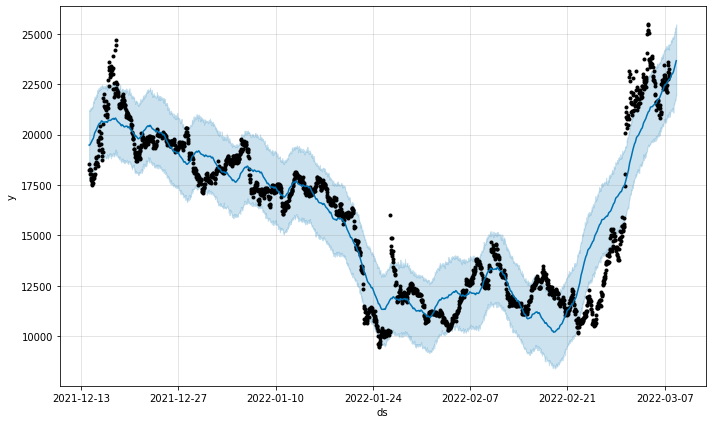

In [76]:
#그래프1
fig1 = model.plot(forecast)

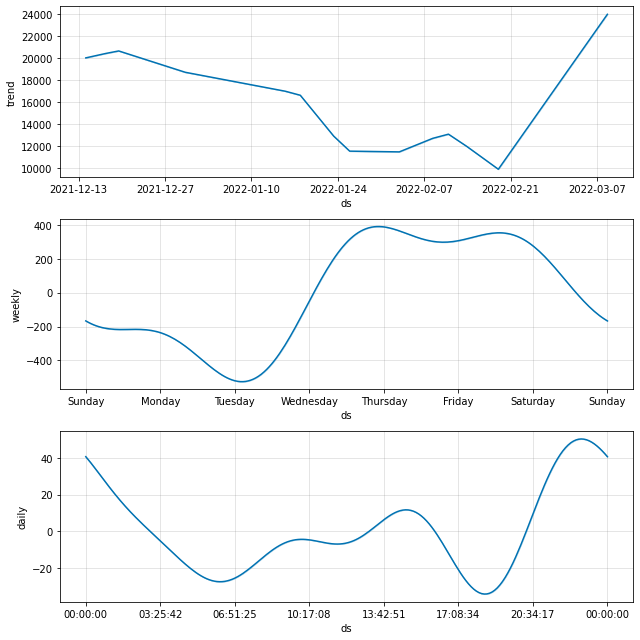

In [77]:
#그래프2
fig2 = model.plot_components(forecast)

In [78]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price(bitcoin)
nowValue

23110.0

In [79]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

23268.752748326475

In [69]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  23020.0
종가의 가격:  18793.09257029145


In [80]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-14 04:00:00,20016.265972,17861.899994,21237.526909,20016.265972,20016.265972,-533.892574,-533.892574,-533.892574,-11.651219,-11.651219,-11.651219,-522.241355,-522.241355,-522.241355,0.0,0.0,0.0,19482.373397
1,2021-12-14 05:00:00,20021.583154,17725.763116,21206.098443,20021.583154,20021.583154,-539.259194,-539.259194,-539.259194,-21.920572,-21.920572,-21.920572,-517.338623,-517.338623,-517.338623,0.0,0.0,0.0,19482.323959
2,2021-12-14 06:00:00,20026.900336,17694.844476,21178.630219,20026.900336,20026.900336,-537.477112,-537.477112,-537.477112,-27.364426,-27.364426,-27.364426,-510.112686,-510.112686,-510.112686,0.0,0.0,0.0,19489.423224
3,2021-12-14 07:00:00,20032.217518,17729.418231,21298.094596,20032.217518,20032.217518,-525.205940,-525.205940,-525.205940,-24.670497,-24.670497,-24.670497,-500.535442,-500.535442,-500.535442,0.0,0.0,0.0,19507.011578
4,2021-12-14 08:00:00,20037.534700,17806.419212,21204.035295,20037.534700,20037.534700,-504.351038,-504.351038,-504.351038,-15.750868,-15.750868,-15.750868,-488.600171,-488.600171,-488.600171,0.0,0.0,0.0,19533.183662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2022-03-08 12:00:00,23850.051974,21746.229229,25237.962204,23845.431375,23855.127556,-424.281882,-424.281882,-424.281882,-6.379167,-6.379167,-6.379167,-417.902715,-417.902715,-417.902715,0.0,0.0,0.0,23425.770092
2020,2022-03-08 13:00:00,23883.313836,21700.660387,25321.588217,23876.811002,23890.646734,-395.146973,-395.146973,-395.146973,-0.314864,-0.314864,-0.314864,-394.832109,-394.832109,-394.832109,0.0,0.0,0.0,23488.166863
2021,2022-03-08 14:00:00,23916.575699,21807.520495,25300.758123,23908.637575,23926.110900,-361.136041,-361.136041,-361.136041,8.675709,8.675709,8.675709,-369.811751,-369.811751,-369.811751,0.0,0.0,0.0,23555.439657
2022,2022-03-08 15:00:00,23949.837561,21990.941080,25379.136681,23939.676599,23960.200714,-331.698455,-331.698455,-331.698455,11.280797,11.280797,11.280797,-342.979252,-342.979252,-342.979252,0.0,0.0,0.0,23618.139107
